In [25]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [26]:
from fastai.vision import *
from fastai.metrics import error_rate

In [27]:
bs = 2

In [28]:
ls

data/  sar_satellite_classification.ipynb


In [29]:
path = "./data/"

In [30]:
#tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

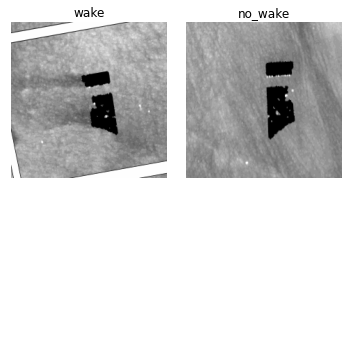

In [31]:
data.show_batch(rows=2, figsize=(5,5))

In [32]:
print(data.classes)
len(data.classes),data.c

['no_wake', 'wake']


(2, 2)

In [33]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [34]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [35]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.131555,0.838583,0.222222,00:01
1,1.233967,1.233282,0.333333,00:01
2,1.162737,0.365464,0.222222,00:01


In [37]:
# check results
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

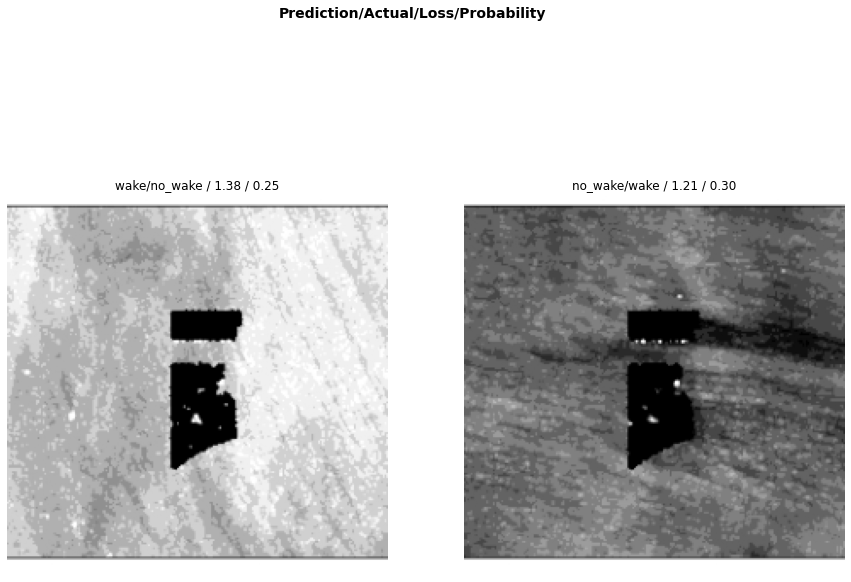

In [39]:
interp.plot_top_losses(2, figsize=(15,11))

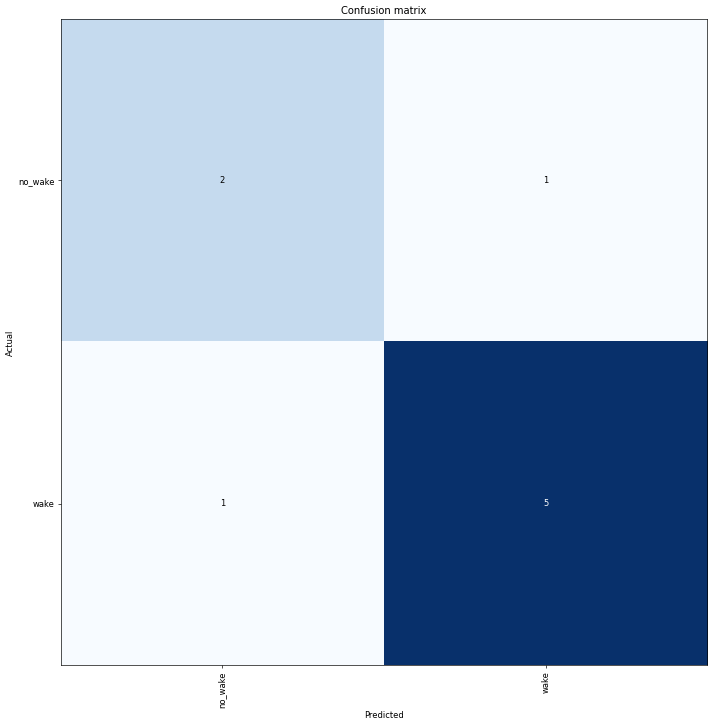

In [40]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)